# 底打ちどころを探る

## 目的

時価総額の大きい銘柄の値動きのトレンドを読むことで、底打ちどころを探る

In [12]:
import datetime
import re

import matplotlib.font_manager as fm
from matplotlib import dates as mdates
import matplotlib.pyplot as plt
import mplfinance as mpf
import numpy as np
import pandas as pd
import yfinance as yf

In [13]:
def get_code_into(code):
    symbol = '%s.T' % code
    ticker = yf.Ticker(symbol)
    df = ticker.history(start='2025-03-24', interval='1d')
    print(code, ticker.info['longName'])
    list_new = list()
    for dt_ts in df.index:
        m = pattern.match(str(dt_ts))
        if m:
            list_new.append(pd.to_datetime(m.group(1)))
        else:
            print('Error!')
    df.index = list_new   
    base = df.at[dt, 'Close']
    ser = df['Close'] / base
    print(ser.tail(3))

### 東証で時価総額上位

Reference: https://www.nikkei.com/marketdata/ranking-jp/market-cap-high/

In [14]:
pattern = re.compile(r'([0-9]{4}-[0-9]{2}-[0-9]{2}).*')

In [15]:
pattern_code = re.compile(r'^(.+)([0-9A]{4}).+$')

ods_name = 'mkt_capital_top_30.ods'
df_ods = pd.read_excel(ods_name)
list_code = list()
for name in df_ods['銘柄名']:
    m = pattern_code.match(name)
    if m:
        print(m.group(1))
        code = m.group(2)
        list_code.append(code)
    else:
        print('ERROR!', name)
print(list_code)

トヨタ
ソニーＧ
三菱ＵＦＪ
日立
ファストリ
キーエンス
ＮＴＴ
任天堂
三井住友ＦＧ
リクルート
ＫＤＤＩ
中外薬
伊藤忠
ＳＢ
三菱商
ＳＢＧ
東京海上
東エレク
三菱重
ＪＴ
みずほＦＧ
信越化
三井物
ホンダ
武田
第一三共
富士通
キヤノン
ＯＬＣ
三菱電
['7203', '6758', '8306', '6501', '9983', '6861', '9432', '7974', '8316', '6098', '9433', '4519', '8001', '9434', '8058', '9984', '8766', '8035', '7011', '2914', '8411', '4063', '8031', '7267', '4502', '4568', '6702', '7751', '4661', '6503']


In [16]:
dt = pd.to_datetime('2025-03-27')
dt

Timestamp('2025-03-27 00:00:00')

In [17]:
summary = pd.DataFrame()
for code in list_code:
    symbol = '%s.T' % code
    ticker = yf.Ticker(symbol)
    df = ticker.history(start='2025-03-24', interval='1d')
    if len(df) == 0:
        print('### no data in', symbol)
        continue
    list_new = list()
    for dt_ts in df.index:
        m = pattern.match(str(dt_ts))
        if m:
            list_new.append(pd.to_datetime(m.group(1)))
        else:
            print('Error!')
    df.index = list_new            
    base = df.at[dt, 'Close']
    ser = df['Close'] / base
    summary[code] = ser

summary

,7203,6758,8306,6501,9983,6861,9432,7974,8316,6098,...,8411,4063,8031,7267,4502,4568,6702,7751,4661,6503
2025-03-24,1.012197,0.974625,1.001377,1.001070,0.973763,0.988840,0.984000,0.969175,0.992379,0.994455,...,0.992525,0.980535,0.970608,1.031250,0.994306,0.994916,0.986138,0.984179,0.998713,0.975996
2025-03-25,1.019091,0.975142,0.993115,1.006153,0.979355,0.988193,0.983333,0.975975,0.980088,1.001085,...,0.978256,0.984738,0.975727,1.032280,0.995401,0.994113,0.964055,0.994658,1.002575,0.961185
2025-03-26,1.020859,0.997411,0.991049,1.014714,0.993548,0.993692,0.992000,1.027199,0.985988,0.993370,...,0.986410,0.990047,0.987450,1.025412,0.992992,0.996521,0.964055,0.996507,0.996138,0.995063
2025-03-27,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2025-03-28,0.971927,0.994548,0.983672,0.985554,0.983656,0.973799,0.994573,0.982321,0.982036,0.970787,...,0.974713,0.986347,0.988415,0.973980,0.999776,0.989749,1.011334,0.989727,0.984516,0.976092
2025-03-31,0.941515,0.977414,0.938185,0.925094,0.947527,0.945819,0.981683,0.916591,0.946856,0.924312,...,0.931264,0.948075,0.940060,0.944093,0.987690,0.947127,0.955635,0.954387,0.950000,0.935673
2025-04-01,0.946734,0.977414,0.930254,0.919743,0.955699,0.936115,0.980326,0.925204,0.934132,0.940488,...,0.930805,0.947851,0.948623,0.945851,1.009176,1.004316,0.960492,0.965276,0.943226,0.925009
2025-04-02,0.955911,0.957944,0.916025,0.927501,0.991398,0.935145,0.968114,0.944696,0.918413,0.977064,...,0.922069,0.945837,0.936199,0.957103,0.997762,0.966280,0.957416,0.964660,0.924677,0.942896
2025-04-03,0.906424,0.911734,0.850478,0.867576,0.974194,0.898916,0.966757,0.913871,0.847804,0.961251,...,0.848736,0.921218,0.914876,0.934951,1.016115,0.979768,0.929080,0.916992,0.919355,0.911249
2025-04-04,0.866475,0.868380,0.778400,0.817014,0.965591,0.884522,0.977612,0.904533,0.779691,0.896910,...,0.753333,0.871531,0.890698,0.883966,1.002014,0.976531,0.909812,0.880214,0.941290,0.869797


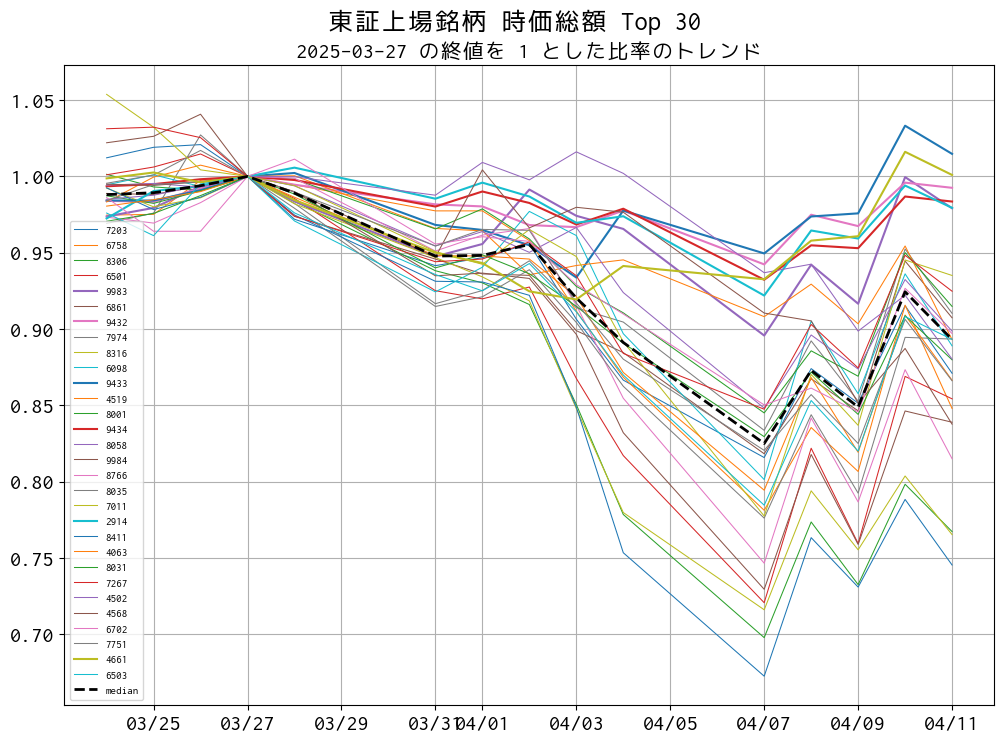

In [25]:
FONT_PATH = "../fonts/RictyDiminished-Regular.ttf"
fm.fontManager.addfont(FONT_PATH)

# FontPropertiesオブジェクト生成（名前の取得のため）
font_prop = fm.FontProperties(fname=FONT_PATH)
font_prop.get_name()

plt.rcParams['font.family'] = font_prop.get_name()
plt.rcParams['font.size'] = 16

fig, ax = plt.subplots(figsize=(12, 8))
plt.subplots_adjust(top=0.91)

for colname in summary.columns:
    match colname:
        case '9983':
            width = 1.5
            lstyle = 'solid'
        case '4661':
            width = 1.5
            lstyle = 'solid'
        case '2914':
            width = 1.5
            lstyle = 'solid'
        case '9432':
            width = 1.5
            lstyle = 'solid'
        case '9433':
            width = 1.5
            lstyle = 'solid'
        case '9434':
            width = 1.5
            lstyle = 'solid'
        case _:
            width = 0.75
            lstyle = 'solid'

    #width = 0.75
    #lstyle = 'solid'
    ax.plot(summary[colname], lw=width, ls=lstyle, label=colname)

ax.plot(summary.median(axis=1), lw=2, color='black', ls='dashed', label='median')

ax.xaxis.set_major_formatter(mdates.DateFormatter("%m/%d"))
#ax.xaxis.set_ticks(df.index)

m = pattern.match(str(dt))
date_str = m.group(1)
fig.suptitle('東証上場銘柄 時価総額 Top 30')
ax.set_title('%s の終値を 1 とした比率のトレンド' % date_str, fontsize=16)
ax.grid()
ax.legend(loc='lower left', fontsize=8)

plt.savefig('report_bottom_out.png' )
plt.show()

In [28]:
for code in ['9433', '4661', '9432', '9434', '2914', '9983']:
    get_code_into(code)
    print()

9433 KDDI Corporation
2025-04-09    0.975790
2025-04-10    1.033238
2025-04-11    1.014772
Name: Close, dtype: float64

4661 Oriental Land Co., Ltd.
2025-04-09    0.960806
2025-04-10    1.016129
2025-04-11    1.000968
Name: Close, dtype: float64

9432 Nippon Telegraph and Telephone Corporation
2025-04-09    0.967436
2025-04-10    0.995930
2025-04-11    0.992537
Name: Close, dtype: float64

9434 SoftBank Corp.
2025-04-09    0.952963
2025-04-10    0.986830
2025-04-11    0.983537
Name: Close, dtype: float64

2914 Japan Tobacco Inc.
2025-04-09    0.959281
2025-04-10    0.994012
2025-04-11    0.979401
Name: Close, dtype: float64

9983 Fast Retailing Co., Ltd.
2025-04-09    0.916559
2025-04-10    0.999570
2025-04-11    0.979140
Name: Close, dtype: float64



In [9]:
summary

,7203,6758,8306,6501,9983,6861,7974,9432,8316,6098,...,2914,4063,8031,7267,4502,4568,6702,7751,4661,6503
2025-03-24,1.012197,0.974625,1.001377,1.001070,0.973763,0.988840,0.969175,0.984000,0.992379,0.994455,...,0.972455,0.980535,0.970608,1.031250,0.994306,0.994916,0.986138,0.984179,0.998713,0.975996
2025-03-25,1.019091,0.975142,0.993115,1.006153,0.979355,0.988193,0.975975,0.983333,0.980088,1.001085,...,0.990419,0.984738,0.975727,1.032280,0.995401,0.994113,0.964055,0.994658,1.002575,0.961185
2025-03-26,1.020859,0.997411,0.991049,1.014714,0.993548,0.993692,1.027199,0.992000,0.985988,0.993370,...,0.993772,0.990047,0.987450,1.025412,0.992992,0.996521,0.964055,0.996507,0.996138,0.995063
2025-03-27,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2025-03-28,0.971927,0.994548,0.983672,0.985554,0.983656,0.973799,0.982321,0.994573,0.982036,0.970787,...,1.005749,0.986347,0.988415,0.973980,0.999776,0.989749,1.011334,0.989727,0.984516,0.976092
2025-03-31,0.941515,0.977414,0.938185,0.925094,0.947527,0.945819,0.916591,0.981683,0.946856,0.924312,...,0.985389,0.948075,0.940060,0.944093,0.987690,0.947127,0.955635,0.954387,0.950000,0.935673
2025-04-01,0.946734,0.977414,0.930254,0.919743,0.955699,0.936115,0.925204,0.980326,0.934132,0.940488,...,0.995928,0.947851,0.948623,0.945851,1.009176,1.004316,0.960492,0.965276,0.943226,0.925009
2025-04-02,0.955911,0.957944,0.916025,0.927501,0.991398,0.935145,0.944696,0.968114,0.918413,0.977064,...,0.986826,0.945837,0.936199,0.957103,0.997762,0.966280,0.957416,0.964660,0.924677,0.942896
2025-04-03,0.906424,0.911734,0.850478,0.867576,0.974194,0.898916,0.913871,0.966757,0.847804,0.961251,...,0.969581,0.921218,0.914876,0.934951,1.016115,0.979768,0.929080,0.916992,0.919355,0.911249
2025-04-04,0.866475,0.868380,0.778400,0.817014,0.965591,0.884522,0.904533,0.977612,0.779691,0.896910,...,0.973892,0.871531,0.890698,0.883966,1.002014,0.976531,0.909812,0.880214,0.941290,0.869797


In [10]:
summary.tail(1).iloc[0]

7203    0.870974
6758    0.847871
8306    0.767203
6501    0.854200
9983    0.979140
6861    0.907327
7974    0.910245
9432    0.992537
8316    0.765220
6098    0.888943
4519    0.893025
9433    1.014772
8001    0.914789
8058    0.898619
8766    0.814956
9434    0.983537
9984    0.838875
8035    0.893377
8411    0.745287
7011    0.935077
2914    0.979401
4063    0.866383
8031    0.879785
7267    0.924754
4502    0.880260
4568    0.837605
6702    0.897021
7751    0.866037
4661    1.000968
6503    0.893189
Name: 2025-04-11 00:00:00, dtype: float64

In [11]:
summary.median(axis=1)

2025-03-24    0.988073
2025-03-25    0.989306
2025-03-26    0.993942
2025-03-27    1.000000
2025-03-28    0.989071
2025-03-31    0.947801
2025-04-01    0.948237
2025-04-02    0.955387
2025-04-03    0.920286
2025-04-04    0.891153
2025-04-07    0.824919
2025-04-08    0.872879
2025-04-09    0.848856
2025-04-10    0.924382
2025-04-11    0.893107
dtype: float64